## Principal Component Analysis
Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In this lab you will apply PCA to reduce the dimensionality of two datasets:
 - The first dataset is two-dimensional data and the objective is to reduce it to 1D.
 - The second dataset is a 16-dimensional (8x8) mnist dataset. 

## Reduce data from 2D to 1D
We are given the following data and the objective is to reduce the dimensions from 2 to 1

(-4.332879249134067, 14.250346324988804, -2.891929996825529, 6.216534855050493)

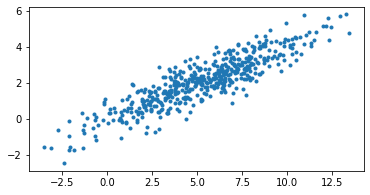

In [39]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
X = np.random.multivariate_normal(mean=[5,2], cov = [[10,4],[4,2]], size=500)

plt.plot(X[:,0], X[:,1], '.')
plt.axis('scaled')

In [40]:
C = np.cov(X.T)
total_variance = np.trace(C)
print('The total variance present in the data is {:.2f}'.format(total_variance))

The total variance present in the data is 11.41


In [41]:
variance_1st_dim = np.cov(X[:,0].T)
variance_2nd_dim = np.cov(X[:,1].T)

print('Keeping the first or second dimension will result in the variance of {:.2f} and {:.2f} respectively'.format(variance_1st_dim, variance_2nd_dim))
print('This will result in loss of {:.2f} and {:.2f} variance respectively'.format(total_variance-variance_1st_dim, total_variance-variance_2nd_dim))
print('We will use PCA to do better than this')

Keeping the first or second dimension will result in the variance of 9.49 and 1.93 respectively
This will result in loss of 1.93 and 9.49 variance respectively
We will use PCA to do better than this


### Implement PCA

In [42]:

# todo

class PCA():
    def __init__(self, X):
        
        self.dim = X.shape[-1]
        
        #TODO: Implement PCA
        # 1. compute mean of X
        self.m = np.mean(X, axis = 0)

        # 2. Subtract mean from X
        Xbar = (X-self.m)
        
        # 3. Compute covariance and svd to find Principal components
        C = np.cov(Xbar.T)
        self.V, self.D, _ = np.linalg.svd(C)
        
    def projection(self, X, n_pc): # n_pc is the number of components to project onto
        if n_pc > self.dim:
            print('No of PCs more than the dims')
            return -1
        
        # 1. subtract mean
        Xbar = (X-self.m)
        
        # 2. Project onto V
        Z = Xbar.dot(self.V[:,:n_pc])
      
        return Z
    
    def reconstruction(self, Z): # n_pc is the number of components to project onto
        n_pc = Z.shape[-1]
        
        # 1. Reconstruction
        X_recon = Z.dot(self.V[:,:n_pc].T) + self.m
        
        return X_recon

### Applying PCA to the above 2D data

In [43]:
pca_2d = PCA(X)
Z = pca_2d.projection(X, 1)
X_recon = pca_2d.reconstruction(Z)

Keeping the first principal component will result in the variance of 11.07
This resulted in loss of 0.34 variance, much better than before


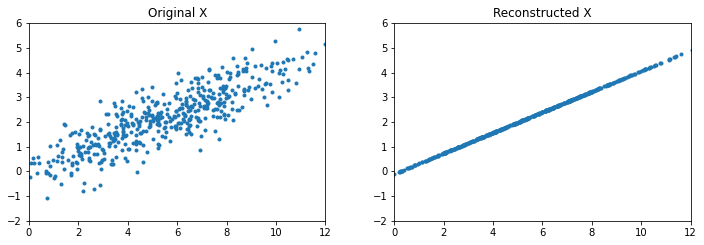

In [44]:
# Plotting the original and reconstructed points
f = plt.figure(figsize=[12,8])
plt.subplot(221)
plt.plot(X[:,0], X[:,1], '.')
plt.axis('scaled')
plt.xlim(0, 12)
plt.ylim(-2, 6)
plt.title('Original X')

plt.subplot(222)
plt.plot(X_recon[:,0], X_recon[:,1], '.')
plt.axis('scaled')
plt.xlim(0, 12)
plt.ylim(-2, 6)
plt.title('Reconstructed X');

print('Keeping the first principal component will result in the variance of {:.2f}'.format(pca_2d.D[0]))
print('This resulted in loss of {:.2f} variance, much better than before'.format(pca_2d.D[1]))

## MNIST Dataset

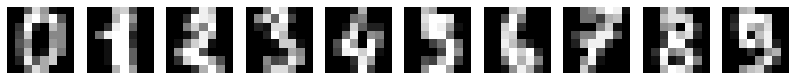

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from matplotlib import pyplot as plt

# loading the dataset
from sklearn.datasets import load_digits
mnist = load_digits()
X = mnist.images

# Display some digits
plt.figure(figsize = [14,4])
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i], cmap='gray');
    plt.axis('off')

### Applying PCA to MNIST image dataset
Apply PCA to mnist dataset by first applying PCA using the algorithm implemented above. You will need to vectorize the data before passing it to the class PCA. Each image is of size 8x8, so after vectorization your data matrix size would be mx64, where m is the total number of images. 

Plot the eigenvalues/variance of data along each principal component. You will notice that only few of the 64 eigenvalues are signifant and therefore you reduce the dimension from 64. Determine the number of principal components/eigen vectors to retain so that your keep 99% of the variance present in the dataset 

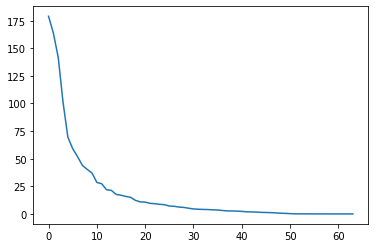


Principal vectors to retain 99% of variance = 41 (99.01% variance)


In [46]:
# todo
X = np.reshape(X,(-1, 64))
pca_64d = PCA(X)
plt.plot(pca_64d.D)
plt.show()
for k in range(1, 65):
  v = sum(pca_64d.D[:k]) / sum(pca_64d.D)
  if (v >= 0.99):
    break;
print('\nPrincipal vectors to retain 99% of variance = {0:d} ({1:0.2f}% variance)'.format(k, v * 100)) 

### Show the reconstructed images
Reconstruct the MNIST data using the principal components that will ensure that 99% of the variance is kept.

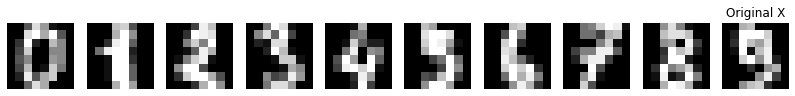

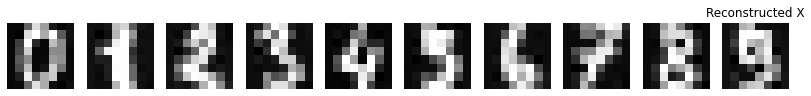

In [47]:
# todo
Z = pca_64d.projection(X, 41)
X_recon = pca_64d.reconstruction(Z)
X_recon = np.reshape(X_recon,(-1, 8, 8))
plt.figure(figsize = [14,4])
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(mnist.images[i], cmap='gray');
    plt.axis('off')
plt.title('Original X');
plt.figure(figsize = [14,4])
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_recon[i], cmap='gray');
    plt.axis('off')
plt.title('Reconstructed X');
